# Backtracking Line Search

In [10]:
import numpy as np

def objective_function(x):
    """Example objective function"""
    return x[0]**2 + 2*x[1]**2 

def gradient(x):
    """Gradient of the objective function"""
    return np.array([2*x[0], 4*x[1]])

def backtracking_line_search(f, grad, x, p, alpha=1.0, beta=0.5, c=1e-4):
    """Backtracking line search with Armijo condition
      f: objective function
      grad: gradient of the objective function
      x: current point
      p: descent direction
      alpha: initial step size
      beta: step size reduction factor
      c: Armijo condition parameter
    """
    while f(x + alpha * p) > f(x) + c * alpha * np.dot(grad(x), p):
        alpha *= beta
    return alpha

Alpha=[]
position=[]

def gradient_descent(f, grad, x0, max_iter=100, tol=1e-6):
    """Gradient descent with backtracking line search"""
    x = x0.copy()
    for _ in range(max_iter):
        p = -grad(x)  # Descent direction
        alpha = backtracking_line_search(f, grad, x, p)
        Alpha.append(alpha)
        position.append(x)
        x_new = x + alpha * p

        if np.linalg.norm(x_new - x) < tol:
            break
        
        x = x_new
    return x

# Example usage
x_initial = np.array([5, 3])  # Initial point
result = gradient_descent(objective_function, gradient, x_initial)
print("Optimal point found:", result)

Optimal point found: [0. 0.]


In [11]:
Alpha

[0.5, 0.25, 1.0]

In [12]:
position

[array([5, 3]), array([ 0., -3.]), array([0., 0.])]

# Momentum

304


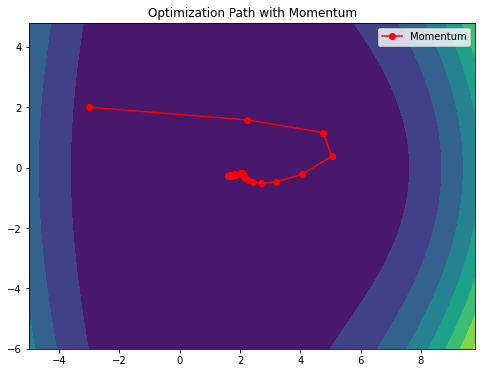

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x, y):
    """Calculates the value of the objective function"""
    return (x - 2)**4 + x**2 * y**2 + (y + 1)**2

def gradient(x, y):
    """Calculates the gradient of the objective function"""
    dx = 4 * (x - 2)**3 + 2 * x * y**2
    dy = 2 * x**2 * y + 2 * (y + 1)
    return np.array([dx, dy])

def momentum_update(x, y, grad, v, gamma=0.9, alpha=0.01):
    """Implements the momentum update rule"""
    v = gamma * v + alpha * grad
    x = x - v[0]
    y = y - v[1]
    return x, y, v

# Set initial values
x_initial = -3
y_initial = 2
v_initial = np.array([0, 0])  # Initial momentum
max_iter = 1000
gamma = 0.5
alpha = 0.01
tolerance = 1e-03

# Optimization loop
x = x_initial
y = y_initial
v = v_initial.copy()
trajectory = [(x, y)]  # Store trajectory as tuples
i = 0
for _ in range(max_iter):
    grad_x, grad_y = gradient(x, y)
    x, y, v = momentum_update(x, y, np.array([grad_x, grad_y]), v, gamma, alpha)
    trajectory.append((x, y))
    
    i = i+1
    # Check for convergence based on gradient magnitude
    if np.linalg.norm(np.array([grad_x, grad_y])) < tolerance:
        break 
print(i)
# Visualization
trajectory = np.array(trajectory)
X, Y = np.meshgrid(np.arange(-5, 10, 0.2), np.arange(-6, 5, 0.2))
Z = objective_function(X, Y)

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, cmap='viridis')
plt.plot(trajectory[:, 0], trajectory[:, 1], '-o', color='red', label='Momentum')
plt.legend()
plt.title("Optimization Path with Momentum")
plt.show()


#### what is the problem here?

In [73]:
# solution here

# Nesterov Momentum

192


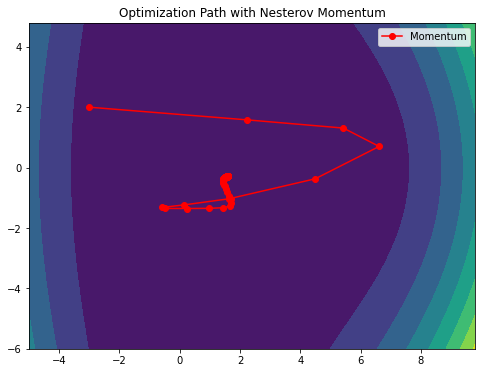

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x, y):
    """Calculates the value of the objective function"""
    return (x - 2)**4 + x**2 * y**2 + (y + 1)**2

def gradient(x, y):
    """Calculates the gradient of the objective function"""
    dx = 4 * (x - 2)**3 + 2 * x * y**2
    dy = 2 * x**2 * y + 2 * (y + 1)
    return np.array([dx, dy])

def nesterov_update(x, y, grad, v, gamma=0.9, alpha=0.01):
    """Implements the Nesterov Accelerated Gradient update rule"""
    ahead_x = x + gamma * v[0]  # Look-ahead for x
    ahead_y = y + gamma * v[1]  # Look-ahead for y
    new_grad = gradient(ahead_x, ahead_y)  # Gradient at look-ahead point
    v = gamma * v + alpha * new_grad 
    x = x - v[0]
    y = y - v[1]
    return x, y, v

# Set initial values, parameters, and tolerance
x_initial = -3
y_initial = 2
v_initial = np.array([0, 0])  
max_iter = 1000
gamma = 0.5 
alpha = 0.01
tolerance = 1e-3 

# Optimization loop
x = x_initial
y = y_initial
v = v_initial.copy()
trajectory = [(x, y)]  
i = 0
for _ in range(max_iter):
    grad_x, grad_y = gradient(x, y)
    x, y, v = nesterov_update(x, y, np.array([grad_x, grad_y]), v, gamma, alpha)
    trajectory.append((x, y))
    i = i+1
    # Check for convergence based on gradient magnitude
    if np.linalg.norm(np.array([grad_x, grad_y])) < tolerance:
        break  
    
# Visualization
trajectory = np.array(trajectory)
X, Y = np.meshgrid(np.arange(-5, 10, 0.2), np.arange(-6, 5, 0.2))
Z = objective_function(X, Y)
print(i)

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, cmap='viridis')
plt.plot(trajectory[:, 0], trajectory[:, 1], '-o', color='red', label='Momentum')
plt.legend()
plt.title("Optimization Path with Nesterov Momentum")
plt.show()


# ADAGRAD

1000


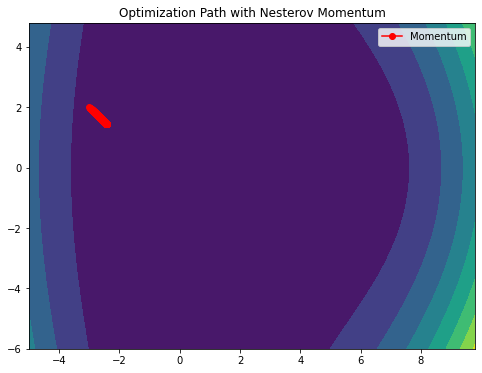

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x, y):
    """Calculates the value of the objective function"""
    return (x - 2)**4 + x**2 * y**2 + (y + 1)**2

def gradient(x, y):
    """Calculates the gradient of the objective function"""
    dx = 4 * (x - 2)**3 + 2 * x * y**2
    dy = 2 * x**2 * y + 2 * (y + 1)
    return np.array([dx, dy])

def adagrad_update(x, y, grad, G, epsilon=1e-8, alpha=0.01):
    """Implements the Adagrad update rule"""
    G[0] += grad[0] ** 2  # Accumulate squared gradient for x
    G[1] += grad[1] ** 2  # Accumulate squared gradient for y

    # Adaptive learning rate 
    adjusted_grad = grad / (np.sqrt(G + epsilon))

    x = x - alpha * adjusted_grad[0]
    y = y - alpha * adjusted_grad[1]
    return x, y, G

# Set initial values, parameters, and tolerance
x_initial = -3
y_initial = 2
G_initial = np.zeros(2)  # Initialize accumulated gradients
max_iter = 1000
epsilon = 1e-8  # Smoothing term to avoid division by zero
alpha = 0.01  # Learning rate
tolerance = 0.001

# Optimization loop
x = x_initial
y = y_initial
G = G_initial.copy()  
trajectory = [(x, y)]  
i = 0
for _ in range(max_iter):
    grad_x, grad_y = gradient(x, y)
    x, y, G = adagrad_update(x, y, np.array([grad_x, grad_y]), G, epsilon, alpha)
    trajectory.append((x, y))
    i = i+1
    # Check for convergence based on gradient magnitude
    if np.linalg.norm(np.array([grad_x, grad_y])) < tolerance:
        break  
    
# Visualization
trajectory = np.array(trajectory)
X, Y = np.meshgrid(np.arange(-5, 10, 0.2), np.arange(-6, 5, 0.2))
Z = objective_function(X, Y)
print(i)

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, cmap='viridis')
plt.plot(trajectory[:, 0], trajectory[:, 1], '-o', color='red', label='Momentum')
plt.legend()
plt.title("Optimization Path with Nesterov Momentum")
plt.show()

# RMSPROP

1000


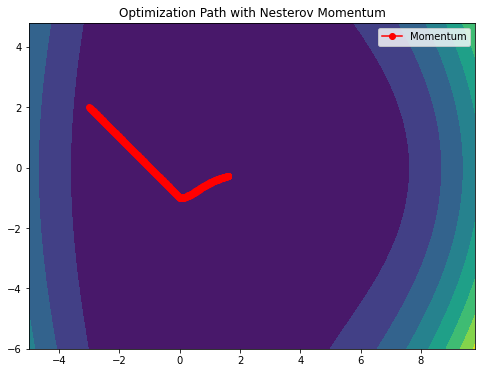

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x, y):
    """Calculates the value of the objective function"""
    return (x - 2)**4 + x**2 * y**2 + (y + 1)**2

def gradient(x, y):
    """Calculates the gradient of the objective function"""
    dx = 4 * (x - 2)**3 + 2 * x * y**2
    dy = 2 * x**2 * y + 2 * (y + 1)
    return np.array([dx, dy])

def rmsprop_update(x, y, grad, G, beta=0.9, epsilon=1e-8, alpha=0.01):
    """Implements the RMSprop update rule"""
    G[0] = beta * G[0] + (1 - beta) * grad[0] ** 2  # Update moving average for  x
    G[1] = beta * G[1] + (1 - beta) * grad[1] ** 2  # Update moving average for  y

    # Adaptive learning rate with bias correction for early iterations
    adjusted_grad = grad / (np.sqrt(G + epsilon))

    x = x - alpha * adjusted_grad[0]
    y = y - alpha * adjusted_grad[1]
    return x, y, G

# Set initial values, parameters, and tolerance
x_initial = -3
y_initial = 2
G_initial = np.zeros(2)  
max_iter = 1000
beta = 0.1  # Typical value for RMSprop
epsilon = 1e-8  
alpha = 0.01  # Adjust as needed 

# Optimization loop
x = x_initial
y = y_initial
G = G_initial.copy()  
trajectory = [(x, y)]  
i = 0

for _ in range(max_iter):
    grad_x, grad_y = gradient(x, y)
    x, y, G = rmsprop_update(x, y, np.array([grad_x, grad_y]), G, beta, epsilon, alpha)
    trajectory.append((x, y))
    i = i+1
    # Check for convergence based on gradient magnitude
    if np.linalg.norm(np.array([grad_x, grad_y])) < tolerance:
        break  
    
# Visualization
trajectory = np.array(trajectory)
X, Y = np.meshgrid(np.arange(-5, 10, 0.2), np.arange(-6, 5, 0.2))
Z = objective_function(X, Y)
print(i)

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, cmap='viridis')
plt.plot(trajectory[:, 0], trajectory[:, 1], '-o', color='red', label='Momentum')
plt.legend()
plt.title("Optimization Path with Nesterov Momentum")
plt.show()

In [91]:
trajectory

array([[-3.        ,  2.        ],
       [-1.94590745,  0.94590745],
       [-1.06811194,  0.27155093],
       ...,
       [ 1.22724722,  0.46778548],
       [ 2.22724722, -0.53221452],
       [ 1.22724722,  0.46778548]])

# ADAM

175


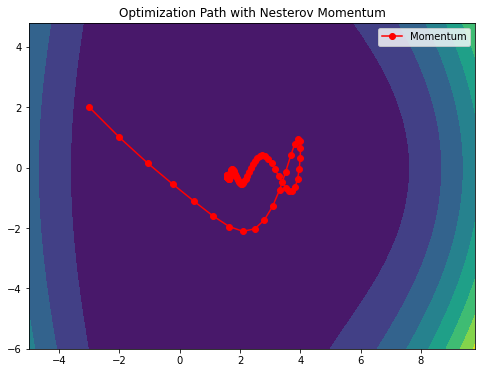

In [98]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x, y):
    """Calculates the value of the objective function"""
    return (x - 2)**4 + x**2 * y**2 + (y + 1)**2

def gradient(x, y):
    """Calculates the gradient of the objective function"""
    dx = 4 * (x - 2)**3 + 2 * x * y**2
    dy = 2 * x**2 * y + 2 * (y + 1)
    return np.array([dx, dy])

def adam_update(x, y, grad, m, v, beta1=0.9, beta2=0.999, epsilon=1e-8, alpha=0.001, t=1):
    """Implements the Adam update rule"""
    m[0] = beta1 * m[0] + (1 - beta1) * grad[0]  # Update biased 1st moment estimate for x
    m[1] = beta1 * m[1] + (1 - beta1) * grad[1]  # Update biased 1st moment estimate for y
    v[0] = beta2 * v[0] + (1 - beta2) * grad[0] ** 2  # Update biased 2nd moment estimate for x
    v[1] = beta2 * v[1] + (1 - beta2) * grad[1] ** 2  # Update biased 2nd moment estimate for y

    # Bias correction for the moving average estimates
    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)

    x = x - alpha * m_hat[0] / (np.sqrt(v_hat[0]) + epsilon)
    y = y - alpha * m_hat[1] / (np.sqrt(v_hat[1]) + epsilon)
    return x, y, m, v, t + 1

# Set initial values, parameters, and tolerance
x_initial = -3
y_initial = 2
m_initial = np.zeros(2)  # Initialize 1st moment vector 
v_initial = np.zeros(2)  # Initialize 2nd moment vector
max_iter = 1000
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8 
alpha = 1 

# Optimization loop
x = x_initial
y = y_initial
m = m_initial.copy()
v = v_initial.copy()
t = 1  # Timestep counter
trajectory = [(x, y)]  
i = 0
for _ in range(max_iter):
    grad_x, grad_y = gradient(x, y)
    x, y, m, v, t = adam_update(x, y, np.array([grad_x, grad_y]), m, v, beta1, beta2, epsilon, alpha, t)
    trajectory.append((x, y))
    i = i+1
    # Check for convergence based on gradient magnitude
    if np.linalg.norm(np.array([grad_x, grad_y])) < tolerance:
        break  
    
# Visualization
trajectory = np.array(trajectory)
X, Y = np.meshgrid(np.arange(-5, 10, 0.2), np.arange(-6, 5, 0.2))
Z = objective_function(X, Y)
print(i)

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, cmap='viridis')
plt.plot(trajectory[:, 0], trajectory[:, 1], '-o', color='red', label='Momentum')
plt.legend()
plt.title("Optimization Path with Nesterov Momentum")
plt.show()

In [99]:
trajectory

array([[-3.        ,  2.        ],
       [-2.        ,  1.        ],
       [-1.0689435 ,  0.1512226 ],
       [-0.238904  , -0.54237277],
       [ 0.48290052, -1.12176206],
       [ 1.10450201, -1.6018302 ],
       [ 1.63779016, -1.95207535],
       [ 2.09298006, -2.1092173 ],
       [ 2.47858268, -2.03059207],
       [ 2.80358217, -1.73714846],
       [ 3.07806529, -1.28473142],
       [ 3.31171055, -0.73153367],
       [ 3.51159295, -0.13995841],
       [ 3.68045788,  0.40509235],
       [ 3.8165511 ,  0.79488155],
       [ 3.91610878,  0.95464153],
       [ 3.97729021,  0.89199636],
       [ 4.00200287,  0.66173651],
       [ 3.99486303,  0.32806087],
       [ 3.9610941 , -0.04286671],
       [ 3.9049359 , -0.38328194],
       [ 3.82934275, -0.63391907],
       [ 3.73686149, -0.76102082],
       [ 3.6307119 , -0.76256036],
       [ 3.51510785, -0.65940423],
       [ 3.39472952, -0.48344556],
       [ 3.27387221, -0.26973922],
       [ 3.15579228, -0.05177466],
       [ 3.04249196,

# Covariance Matrix